# Properties of the Fourier Transform

These demonstrations go beyond the content of the course. I don't expect you to understand what is going on in these snippets of code. But I show them to you so you see what sorts of things can be implemented by manipulating the Fourier coefficients.

## Preliminaries

In [69]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift, ifftshift
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()
from scipy import ndimage, misc
from scipy.signal import gaussian

In [2]:
def Gaussian2D(dims, std):
    '''
        Creates an array containing a 2-D Gaussian function, with mean
        at mu, and standard deviation std.

        Inputs:
          dims is a 2-vector containing the number of rows and columns
          std is the standard deviation
    '''
    nr, nc = dims
    rr, cc = np.mgrid[0:nr,0:nc]
    ctr = GetCentre(rr)
    temp1 = rr - ctr[0]
    temp2 = cc - ctr[1]
    temp1 = np.exp(-temp1**2/std)
    temp2 = np.exp(-temp2**2/std)
    blah = temp1*temp2
    return blah/sum(blah.flatten())

def GetCentre(f):
    return np.array(np.floor(np.array(np.shape(f))/2.), dtype=int)

In [72]:
f = np.arange(1,16)
print(f)
F = np.fft.fft(f)
G = np.conj(F)
g = np.fft.ifft(G)
print(np.real(g))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 1. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.]


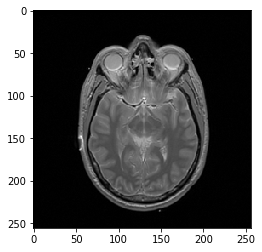

In [3]:
f = np.array(plt.imread('pd.jpg')[:,:,0], dtype=float)
plt.imshow(f,cmap='gray');

## View the Fourier coefficients

In [4]:
F = fft2(f)

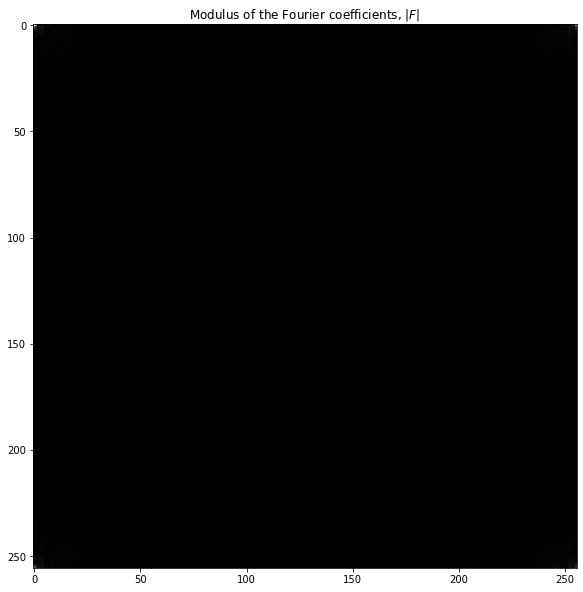

In [8]:
# Plot the modulus of the Fourier coefs
# DC is in the top-left corner
plt.figure(figsize=[10,10]);
plt.imshow(abs(F), cmap='gray');
plt.title(r"Modulus of the Fourier coefficients, $|F|$");

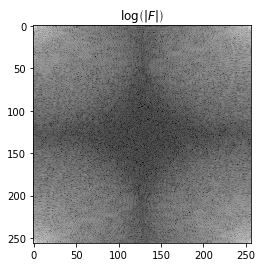

In [11]:
plt.imshow(np.log(abs(F)), cmap='gray');
plt.title(r'$\log \left( |F| \right)$');

## Shift it so the DC is in the centre

In [12]:
F = fftshift(fft2(f))

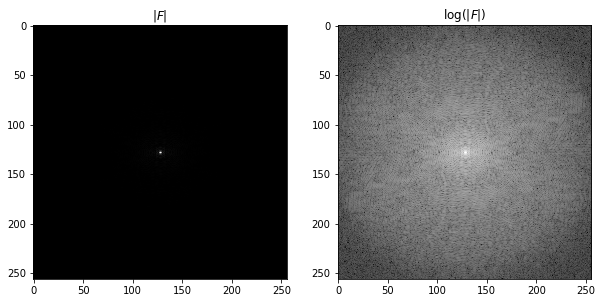

In [15]:
plt.figure(figsize=[10,5]);
plt.subplot(1,2,1); plt.imshow(abs(F), cmap='gray'); plt.title(r'$|F|$')
plt.subplot(1,2,2); plt.imshow(np.log(abs(F)), cmap='gray'); plt.title(r'$\log (|F|)$');

## 2D DFT

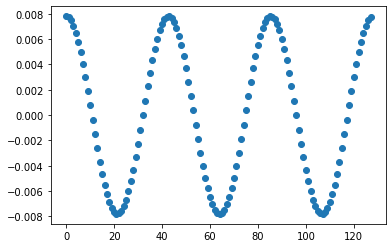

In [16]:
# A 1D Fourier basis vector
plt.clf()
F = np.zeros(128)
F[3] = 1.
#F[10] = 0.5
f = ifft(F)
plt.plot(np.real(f), 'o');

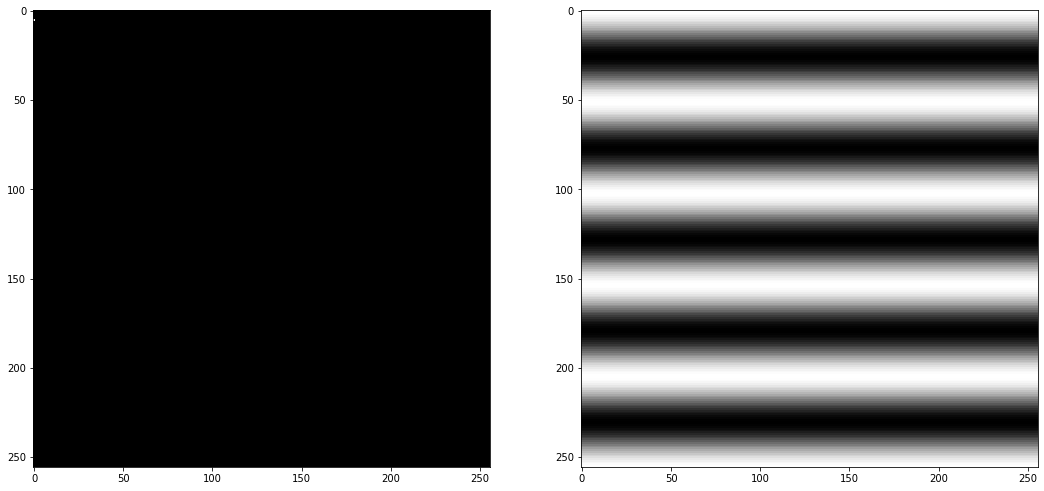

In [17]:
# A 2D Fourier vasis vector
F = np.zeros([256,256])
F1 = F.copy()
F1[5,0] = 1.
f1 = ifft2(F1)
plt.figure(figsize=[18,9])
plt.subplot(1,2,1)
plt.imshow(F1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.real(f1), cmap='gray');

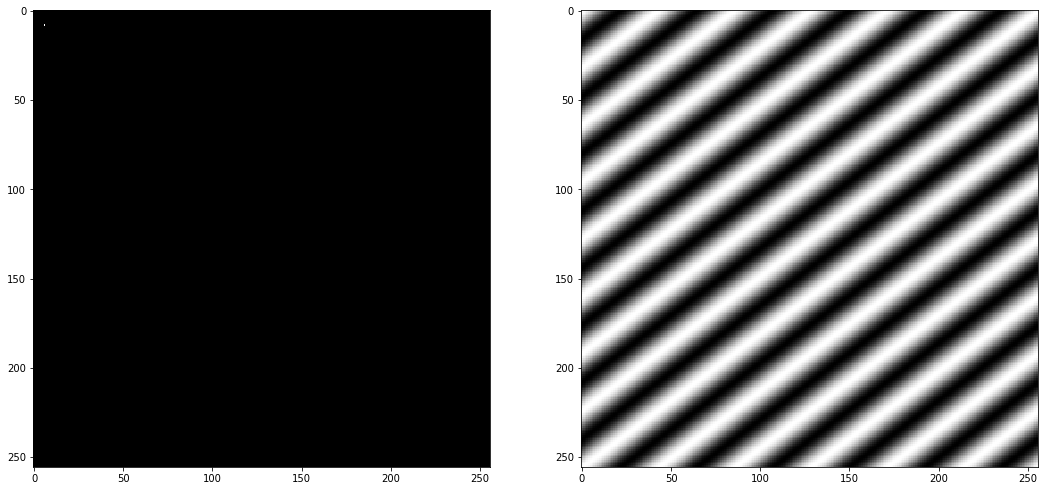

In [18]:
# A 2D Fourier vasis vector
F = np.zeros([256,256])
F1 = F.copy()
F1[8,6] = 1.0
f1 = ifft2(F1)
plt.figure(figsize=[18,9])
plt.subplot(1,2,1)
plt.imshow(F1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.real(f1), cmap='gray');

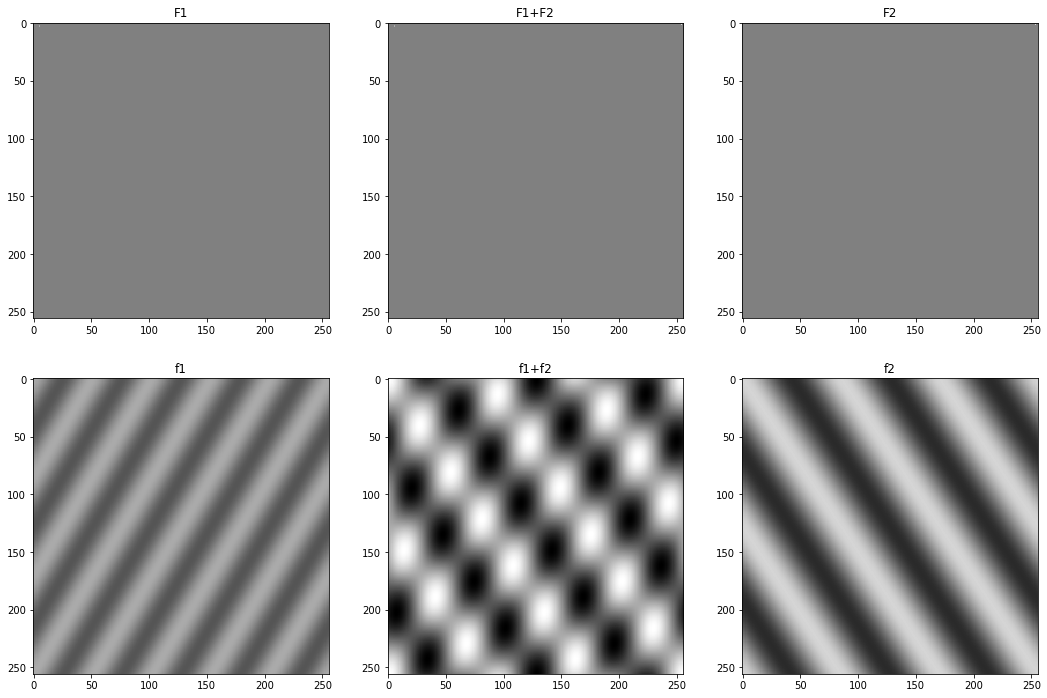

In [19]:
F1 = F.copy(); F1[3,5] = 1.0
F2 = F.copy(); F2[2,-3] = 2.0
f1 = ifft2(F1)
f2 = ifft2(F2)
plt.figure(figsize=[18,12]); MN = 256.**2; rg = 3.;
plt.subplot(2,3,1); plt.imshow(np.abs(F1), vmin=-rg, vmax=rg, cmap='gray'); plt.title('F1')
plt.subplot(2,3,4); plt.imshow(np.real(f1), vmin=-rg/MN, vmax=rg/MN, cmap='gray'); plt.title('f1')
plt.subplot(2,3,3); plt.imshow(np.abs(F2), vmin=-rg, vmax=rg, cmap='gray'); plt.title('F2')
plt.subplot(2,3,6); plt.imshow(np.real(f2), vmin=-rg/MN, vmax=rg/MN, cmap='gray'); plt.title('f2')
plt.subplot(2,3,2); plt.imshow(np.abs(F1+F2), vmin=-rg, vmax=rg, cmap='gray'); plt.title('F1+F2')
plt.subplot(2,3,5); plt.imshow(np.real(f1+f2), vmin=-rg/MN, vmax=rg/MN, cmap='gray'); plt.title('f1+f2');

## Convolution

In [20]:
rr, cc = np.mgrid[-128:128, -128:128]

### Try a circular kernel

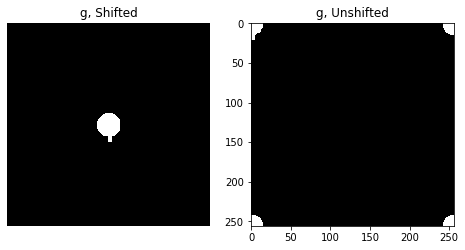

In [25]:
d = np.sqrt(rr**2 + cc**2)
circle = np.zeros([256,256])
circle_mask = d<15
circle[circle_mask] = 1.
circle = ifftshift(circle)
circle[0:22,0:5] = 1.
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(fftshift(circle), cmap='gray'); plt.axis('off'); plt.title('g, Shifted');
plt.subplot(1,2,2); plt.imshow(circle, cmap='gray'); plt.title('g, Unshifted');

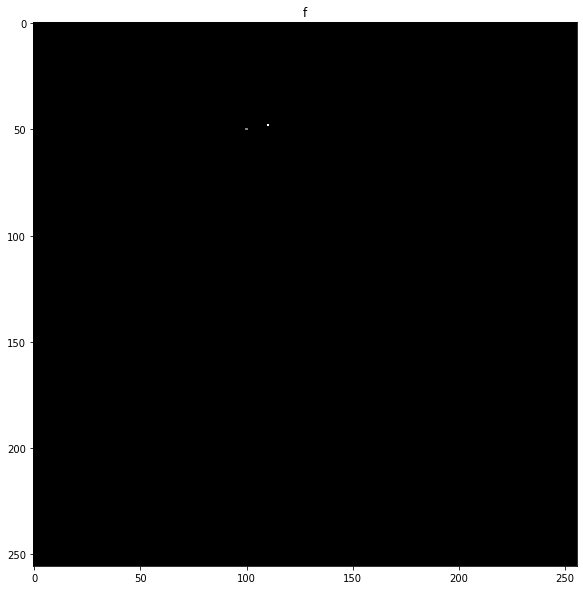

In [26]:
# Create an image with just a few non-zero pixels.
f = np.zeros([256,256])
f[50,100] = 1.0
f[48,110] = 2.
plt.figure(figsize=(10,10))
plt.imshow(f, cmap='gray'); plt.title('f');

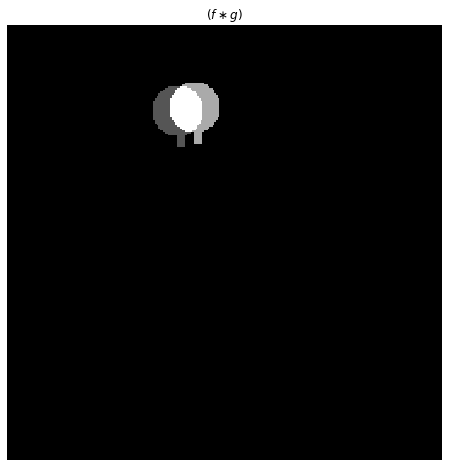

In [28]:
g = ifft2( fft2(f) * fft2(circle))

plt.figure(figsize=(8,8))
plt.imshow(abs(g), cmap='gray'); plt.axis('off');
plt.title(r'$(f \ast g)$');

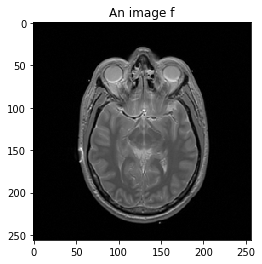

In [30]:
f = plt.imread('pd.jpg')
f = f[:,:,0]
plt.imshow(f, cmap='gray'); plt.title('An image f');

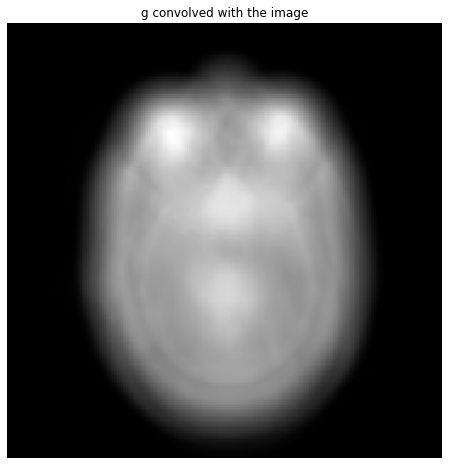

In [31]:
g = ifft2( fft2(f) * fft2(circle))

plt.figure(figsize=(8,8))
plt.imshow(abs(g), cmap='gray'); plt.axis('off');
plt.title('g convolved with the image');

### Or, try a Gaussian edge-detector kernel

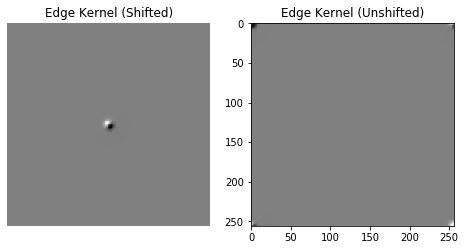

In [32]:
# Make and edge detector
g = Gaussian2D([256,256], 20)
G = ifftshift( fft2(fftshift(g)) )
ramp = np.outer(range(256), range(256)) - 128**2
H = G * ramp*1.j
circle = np.real( ifft2( fftshift(H) ) )
plt.figure(figsize=[8,5]);
plt.subplot(1,2,1); plt.imshow(fftshift(circle), cmap='gray'); plt.axis('off'); plt.title('Edge Kernel (Shifted)');
plt.subplot(1,2,2); plt.imshow(circle, cmap='gray'); plt.title('Edge Kernel (Unshifted)');

In [33]:
f = plt.imread('pd.jpg')
f = f[:,:,0]

In [34]:
F = fftshift( fft2( f ) )

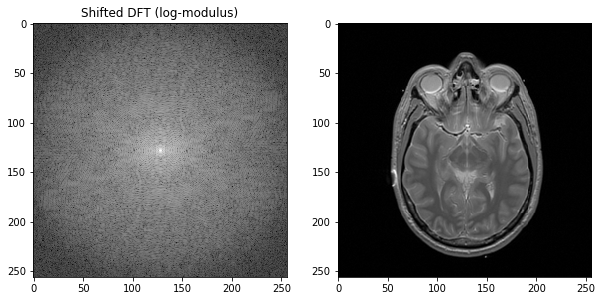

In [35]:
plt.figure(figsize=[10,20])
plt.subplot(1,2,1)
plt.imshow(np.log(abs(F)+1), cmap='gray'); plt.title('Shifted DFT (log-modulus)');
plt.subplot(1,2,2)
plt.imshow(f, cmap='gray');

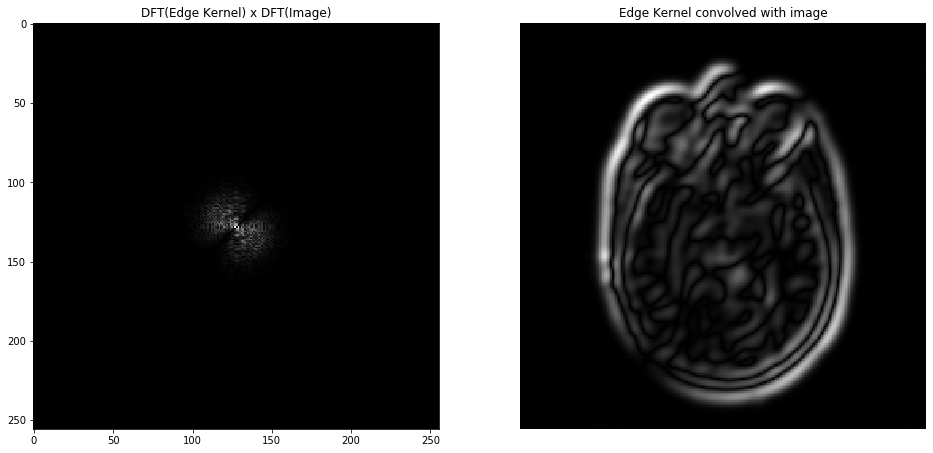

In [36]:
g = fftshift( ifft2( fft2(ifftshift(f)) * fft2(circle)) )

plt.figure(figsize=(16,8))
plt.subplot(1,2,1);
G = fftshift(fft2(ifftshift(g)))
plt.imshow(np.abs(G), cmap='gray');
plt.title('DFT(Edge Kernel) x DFT(Image)');
plt.subplot(1,2,2); plt.imshow(abs(g), cmap='gray'); plt.axis('off');
plt.title('Edge Kernel convolved with image');

## Filtering in the frequency domain

In [37]:
thresh = 10
rows, cols = np.shape(f)
ctr = np.floor(np.array(np.shape(f))/2) +1
rr, cc = np.mgrid[-ctr[0]:(rows-ctr[0]),
                  -ctr[1]:(cols-ctr[1])]

In [38]:
def PlotFiltImg(F, filt):
    F_filt = (filt)*F
    f_filt = ifft2( fftshift(F_filt) )
    plt.figure(figsize=[15,15])
    plt.subplot(2,2,1); plt.imshow(f, cmap='gray');
    plt.subplot(2,2,3); plt.imshow(np.log(abs(F)+1), cmap='gray')
    plt.subplot(2,2,4); plt.imshow(np.log(abs(F_filt)+1), cmap='gray')
    plt.subplot(2,2,2); plt.imshow(np.real(f_filt), cmap='gray');

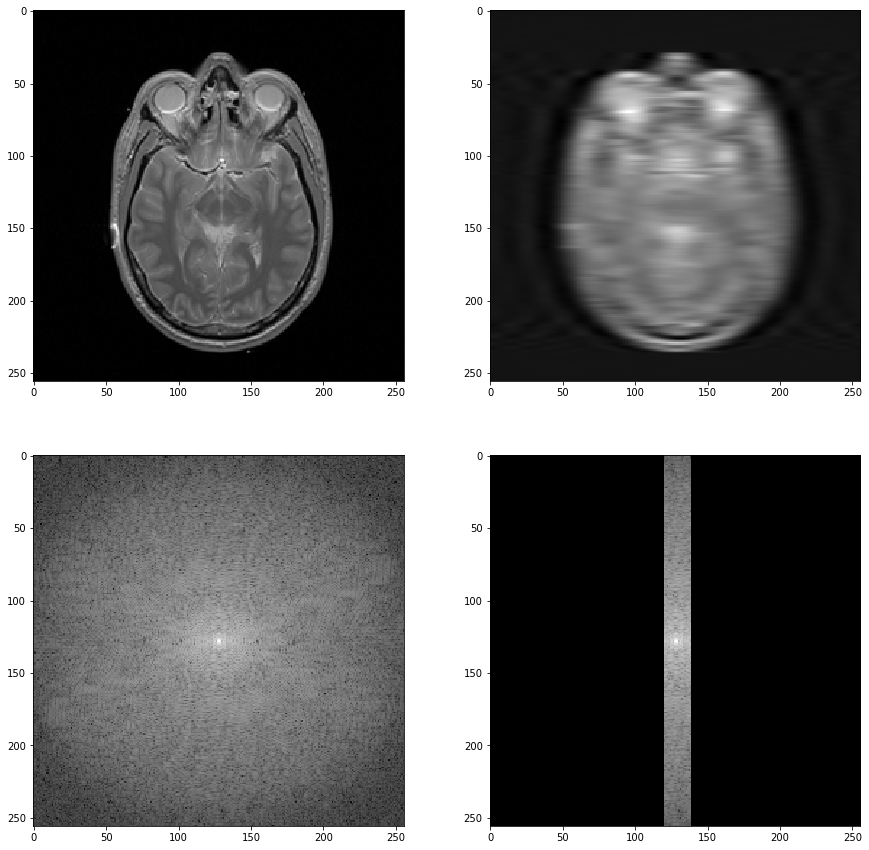

In [39]:
filt_mask = abs(cc)<thresh
filt = np.zeros(np.shape(F))
filt[filt_mask] = 1.0
PlotFiltImg(F, filt)

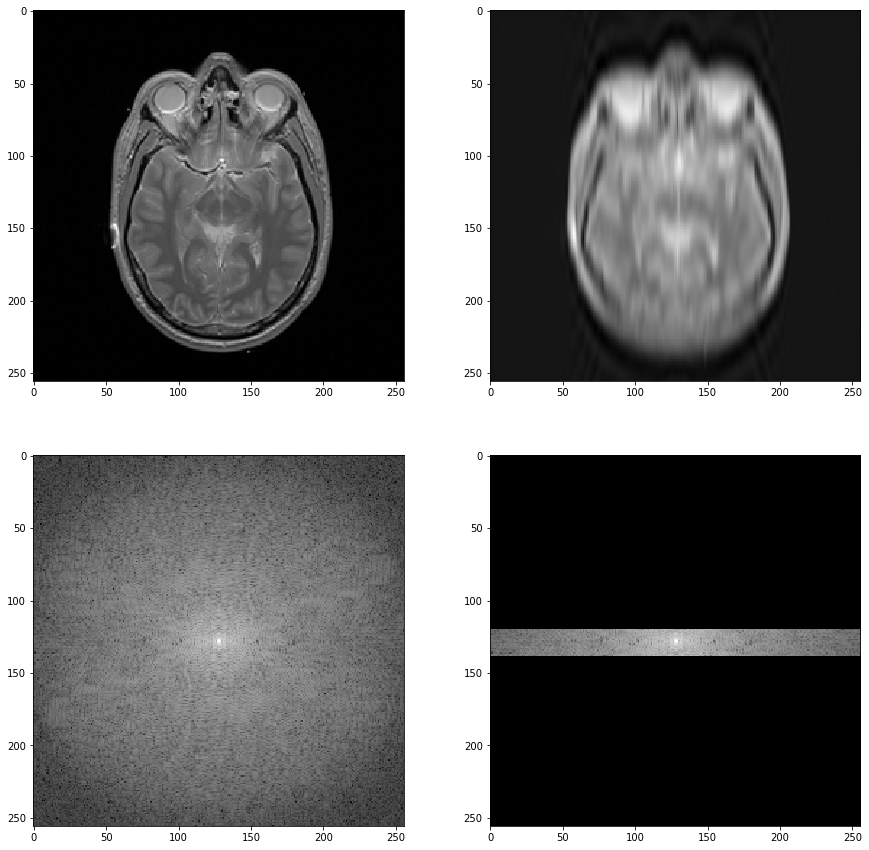

In [40]:
filt_mask = abs(rr)<thresh
filt = np.zeros(np.shape(F))
filt[filt_mask] = 1.0
PlotFiltImg(F, filt)

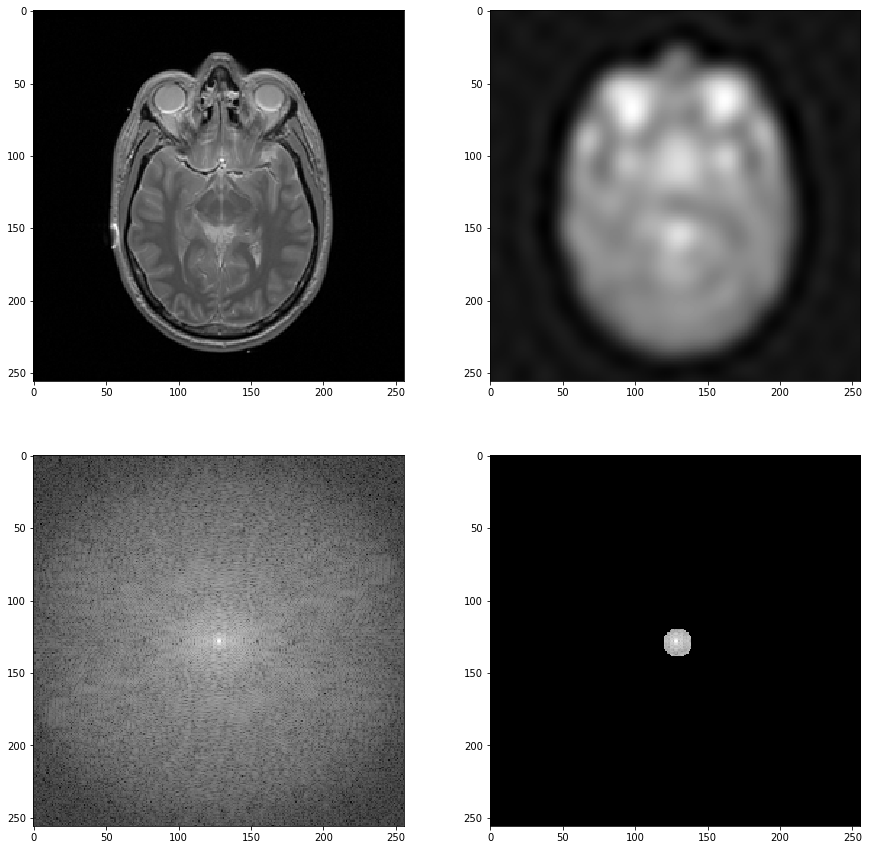

In [41]:
filt_mask = np.sqrt(rr**2 + cc**2)<thresh
filt = np.zeros(np.shape(F))
filt[filt_mask] = 1.0
PlotFiltImg(F, filt)

Applying that filter in the frequency domain is the same as convolving the image with the kernel below, attained by taking the IDFT of the filter kernel.

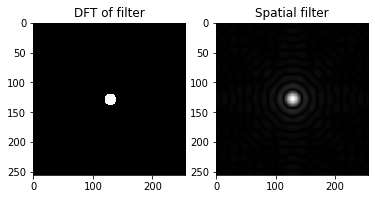

In [42]:
Filt = fftshift(ifft2(ifftshift(filt)))
plt.figure()
plt.subplot(1,2,1); plt.imshow(filt, cmap='gray'); plt.title('DFT of filter')
plt.subplot(1,2,2); plt.imshow(np.log(abs(Filt)+1), cmap='gray'); plt.title('Spatial filter');

## What happens if we take the DFT twice in a row?

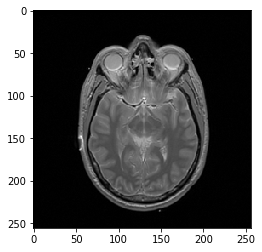

In [43]:
plt.imshow(f, cmap='gray');

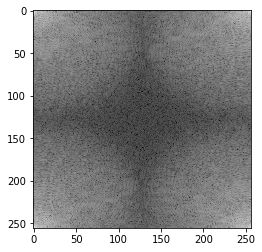

In [44]:
F = fft2(f)
plt.imshow(np.log(abs(F)), cmap='gray');

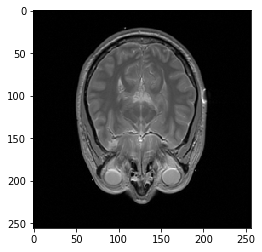

In [45]:
G = fft2(F)
plt.imshow(np.real(G), cmap='gray');

## Scaling
You can scale an image using the DFT by padding in cropping in the two domains (time/space, and frequency).

In [46]:
# We will magnify an image by padding its DFT coefficients, and then cropping the image
# that results for the IDFT of those padded coefs.
scale_factor = 2
padamt = int(rows*(scale_factor-1.)/2.)
G = np.pad(ifftshift(F), (padamt,), mode='constant')
g512 = ifft2( ifftshift(G) )
if padamt!=0:
    g = g512[padamt:-padamt,padamt:-padamt]
else:
    g = g512

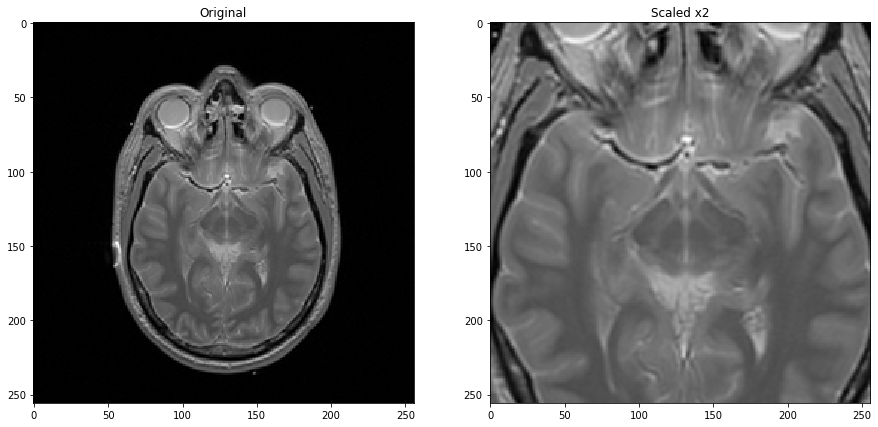

In [47]:
plt.figure(1,figsize=[15,15])
plt.clf()
plt.subplot(1,2,1)
plt.imshow(f, cmap='gray'); plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(np.real(g), cmap='gray'); plt.title('Scaled x'+str(scale_factor));

## Fourier Shift Theorem
You can shift an image by adding a linear 'ramp' to the phase portion of its DFT coefficients.

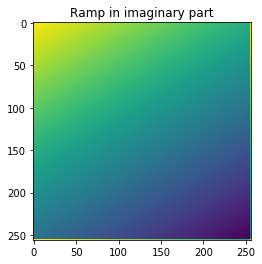

In [48]:
dr = 20
dc = 12
ramp = -2.*np.pi*1j*(cc*dc + rr*dr)/rows
ramp = np.roll(np.roll(ramp,-1, axis=0),-1, axis=1)
wave = np.exp(ramp)
plt.figure()
plt.imshow(np.imag(ramp))
plt.title('Ramp in imaginary part');

In [49]:
# Make sure the centre pixel of the ramp has a phase of zero.
ctr = int(np.floor(256/2))
print('This should be zero -> '+str(ramp[ctr,ctr]))
print('This is the DC of our image -> '+str(F[ctr,ctr]))  # This should be the DC of our image.

This should be zero -> -0j
This is the DC of our image -> (-19+0j)


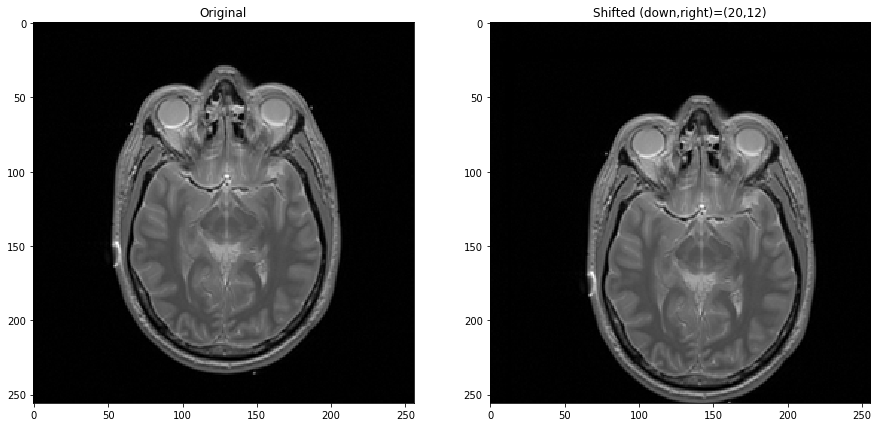

In [50]:
G = wave * fftshift(F)
g = ifft2(ifftshift(G))

plt.figure(1,figsize=[15,15])
plt.subplot(1,2,1)
plt.imshow(f, cmap='gray'); plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(np.real(g), cmap='gray');
plt.title('Shifted (down,right)=('+str(dr)+','+str(dc)+')');

<a href="https://youtu.be/o3Q7JYBkOHU">Pendulum synchronization video (YouTube)</a>

## Phase Correlation
You can detect a shift between two similar images by looking for a ramp in their phase difference. Or, you can take that phase difference and take the IDFT of it, and look for a spike. The offset of the spike from the origin gives the relative shift.

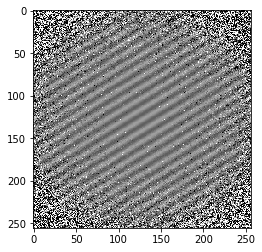

In [51]:
g = ndimage.shift(f,[dr,dc]) + np.random.normal(0.0, 5, size=np.shape(f))
G = fft2(g)
F = fft2(f)
H = G/F
plt.imshow(np.real(fftshift(H)), cmap='gray', vmin=-4, vmax=4);

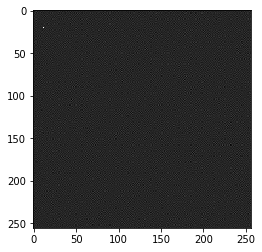

In [52]:
h = ifft2(H)
plt.imshow(np.real(h), cmap='gray');

In [53]:
# Where does that lonely pixel occur?
coords = np.unravel_index(np.argmax(np.real(h)), h.shape)
print('Bright pixel at '+str(coords))
print('True shift was '+str((dr,dc)))

Bright pixel at (20, 12)
True shift was (20, 12)


## Rotation
You can also rotate an image by simply applying the same rotation to the frequency domain.

In [54]:
theta = 30
f = plt.imread('pd.jpg')
f = np.array(f[:,:,0], dtype=float)

In [55]:
padamt = int(rows/2)
#padamt = 0

In [56]:
ff = f
ff = np.pad(f, (padamt,), mode='constant')
FF = fftshift( fft2( ifftshift(ff) ) )

In [57]:
# Apply rotation to the Fourier coefficients
Gr = ndimage.rotate(np.real(FF), theta, reshape=False, order=1)
Gi = ndimage.rotate(np.imag(FF), theta, reshape=False, order=1)
G = Gr + 1j*Gi

In [58]:
g = fftshift( ifft2( ifftshift(G) ) )
if padamt!=0:
    g = g[padamt:-padamt,padamt:-padamt]

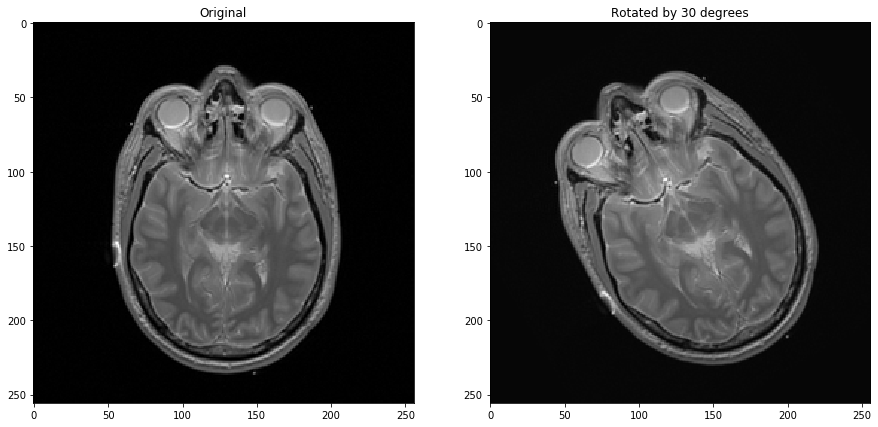

In [59]:
plt.figure(figsize=[15,15])
plt.subplot(1,2,1)
plt.imshow(f, cmap='gray'); plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(np.real(g), cmap='gray'); 
plt.title('Rotated by '+str(theta)+' degrees');

## Fourier Projection Theorem
The Fourier projection theorem is the basis for reconstruction in Computed Tomography (CT) scans.

In [60]:
f = plt.imread('ct.jpg')
f1 = np.array(f[:,:,0], dtype=float)

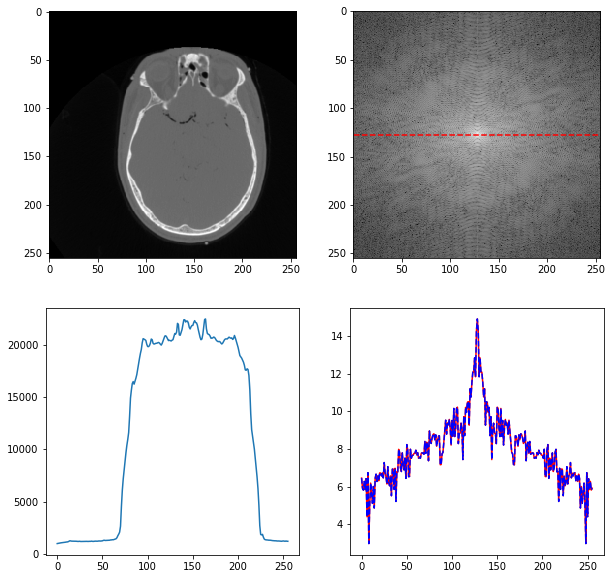

In [61]:
plt.figure(1, figsize=(10,10))
plt.clf()
plt.subplot(2,2,1)
plt.imshow(f1, cmap=plt.cm.gray);

px = np.sum(f1,axis=0)
plt.subplot(2,2,3)
plt.plot(px)
plt.axis('tight');

F = fftshift(fft2(f1))
plt.subplot(2,2,2)
Fnice = np.log(abs(F)+1)
plt.imshow(Fnice, cmap=plt.cm.gray);

ctr = GetCentre(F)
Fx = F[ctr[0],:]
plt.plot([1,254],[128,128], 'r--')
plt.axis([0,255,255,0])

plt.subplot(2,2,4)
plt.plot(np.log(abs(Fx)+1), 'r')
plt.axis('tight');

Px = fftshift( np.fft.fft(px) )
#plt.subplot(2,2,4)
plt.plot(np.log(abs(Px)+1), 'b--');

## Aliasing in images

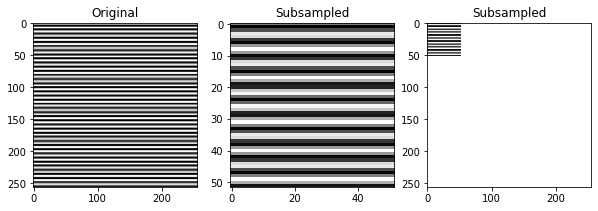

In [62]:
x, y = np.mgrid[0:256,0:256]
f = np.sin(2.*np.pi*x/256*40)
#f = ndimage.imread('pd.jpg')
plt.figure(figsize=(10,5))
plt.clf()
plt.subplot(1,3,1)
plt.imshow(f, cmap='gray');
c = plt.axis()
plt.title('Original');

g = f[::5,::5]  # every fifth sample
plt.subplot(1,3,2)
plt.imshow(g, cmap='gray'); #plt.axis(c);
plt.title('Subsampled');

plt.subplot(1,3,3);
plt.imshow(g, cmap='gray'); plt.axis(c);
plt.title('Subsampled');

In [63]:
q = plt.imread('bricks.jpg')
q = np.array(q[:,:,0], dtype=float)
nr, nc = np.shape(q)

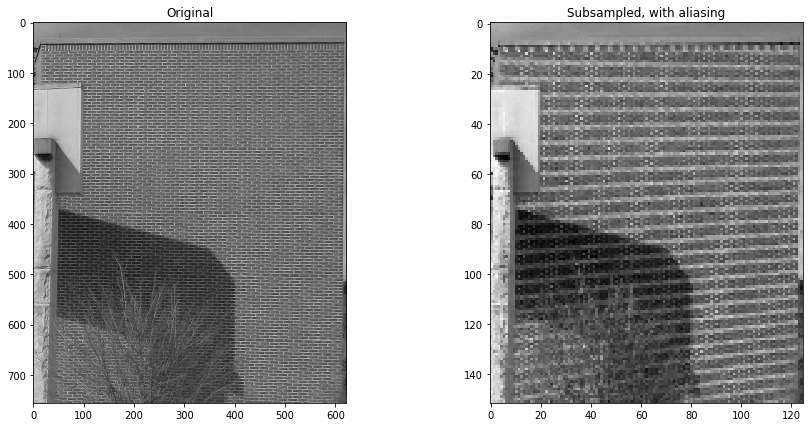

In [65]:
plt.figure(figsize=(15,7));
plt.subplot(1,2,1)
plt.imshow(q, cmap='gray', interpolation='none')
plt.title('Original');

q_small = q[::5,::5]
qsr, qsc = np.shape(q_small)
plt.subplot(1,2,2)
plt.imshow(q_small, cmap='gray', interpolation='nearest')
plt.title('Subsampled, with aliasing');

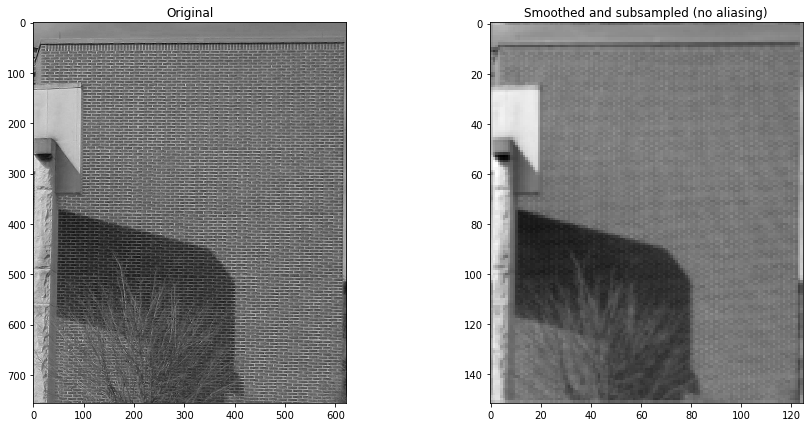

In [68]:
plt.figure(figsize=(15,7));
plt.subplot(1,2,1)
plt.imshow(q, cmap='gray', interpolation='none')
plt.title('Original');

q_small = q[::5,::5]
qsr, qsc = np.shape(q_small)

g = Gaussian2D(q.shape, 10)
Q = fftshift( fft2(q) )
G = fftshift( fft2(fftshift(g)) )
h = ifft2(ifftshift(Q*G))

plt.subplot(1,2,2)
plt.imshow(np.real(h[::5,::5]), cmap='gray', interpolation='nearest')
plt.title('Smoothed and subsampled (no aliasing)');